# Data Science - Coursework 1 (35%)

***

## Short Style Data Science Questions
### Deadline Friday week 6, 2pm.

***

## Instructions

This coursework assesses learning outcomes from **Chapters 1 - 5** of the course.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf. **Don't forget to execute all of your cells before you export the notebook to pdf**.
- You can constantly resubmit your turnitin document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't forget to include **all code** (including for calculations) - your work should be entirely reproducible.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 15-20 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

***

## QUESTION 1


**[10 marks]**

Answer:

The first part of this question will be done with basic probability to demonstate understanding.

In [86]:
def passfunc(f):
  return f*0.85

'''A)'''
'''i)'''
#for the probability of all 3 passes you would multiply the probability for a single pass by itself 3 times...
allPassA = passfunc(1) * passfunc(1) * passfunc(1)
print(f"All Pass:{allPassA:.3f}")

'''ii)'''
#fail one module and pass the other 2 = pass*pass*(1-pass). 3 ways, fail module one two or three
oneFailA = 3 * (passfunc(1) * passfunc(1) * (1-passfunc(1)))
print(f"Two Pass:{oneFailA:.3f}")

'''iii)'''
#fail 2 modules, 3 ways
twoFailA = 3* (passfunc(1) * (1-passfunc(1)) * (1-passfunc(1)))
print(f"One Pass:{twoFailA:.3f}")

'''iv)'''
#failAll
allFailA = (1-passfunc(1)) * (1-passfunc(1)) * (1-passfunc(1))
print(f"No Pass:{allFailA:.3f}")

'''B)'''

#Add to one?
print(f"All probabilities add to {allPassA + oneFailA + twoFailA + allFailA:.3f}")

All Pass:0.614
Two Pass:0.325
One Pass:0.057
No Pass:0.003
All probabilities add to 1.000


This next part with slightly more nuanced techniques.

In [87]:
'''C)'''
# These are yes/no, or in this case Pass/NoPass, results. Having a fixed probability within a set number of trials/tests.
# We can therefore model these calculations using binomial statstics.

import math

def Binomial(n, k, p):
    # n: number of trials, k: successes , p: probability of a single event
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

p = passfunc(0.5)

n = 3 # number of tests


'''i)'''
#for the probability of all 3 passes...
allPassC = Binomial(n, 3, p)
print(f"All Pass: {allPassC:.3f}")

'''ii)'''
#fail one module and pass the other 2
oneFailC = Binomial(n, 2, p)
print(f"One Fail: {oneFailC:.3f}")

'''iii)'''
#fail 2 modules
twoFailC = Binomial(n, 1, p)
print(f"Two Fail: {twoFailC:.3f}")

'''iv)'''
#failAll
allFailC = Binomial(n, 0, p)
print(f"All Fail: {allFailC:.3f}")

#sanity check
print(f"All probabilities add to {allPassC + oneFailC + twoFailC + allFailC:.3f}")

All Pass: 0.077
One Fail: 0.312
Two Fail: 0.422
All Fail: 0.190
All probabilities add to 1.000


To calculate the fraction of weekly sessions that a student would need to attend to only have a 50% chance of passing we can go back to our answer in

Q1,A,i)

P(pass) = (FractionOfAttendance*moduleProbability)^3

The pass probability is the fraction of classes you attend multiplied by the module pass probability, and this is multiplied by itself for each module.

With some quick algebra

P(pass)^1/3 = FractionOfAttendance*moduleProbability

FractionOfAttendance = (P(pass)^1/3)/moduleProbability

In [88]:
def inversePassFunc(P):
  return (P**(1/3))/0.85

print(f"Fraction of weekly classes attened to get 0.5 P(pass) = {inversePassFunc(0.5):.3f}")

Fraction of weekly classes attened to get 0.5 P(pass) = 0.934


In [89]:
#sanity check - Should give 0.5 back
print(f"{passfunc(0.934)**3:.3f}")

0.500


Alternativly, brute force

Fraction of weekly sessions needed to attend to have 50% pass probability =  0.934


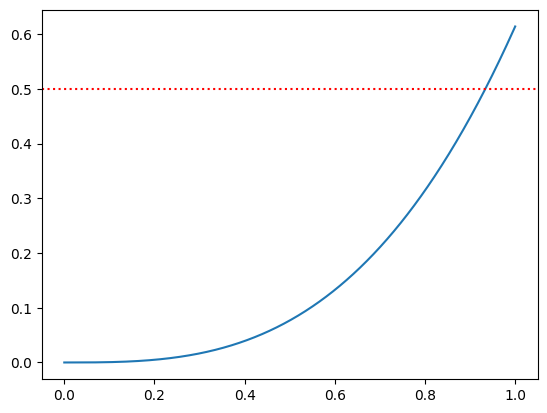

In [90]:
fractions = np.arange(0, 1.001, 0.001)
passProb = []
for n in fractions:
  passProb.append(Binomial(3,3,passfunc(n)))

plt.plot(fractions,passProb)
plt.axhline(y=0.5, color='r', linestyle=':', label='50% Pass Probability')

passProb = np.array(passProb)

closest = np.argmin(np.abs(passProb - 0.5))
print("Fraction of weekly sessions needed to attend to have 50% pass probability = ",fractions[closest])

And finally is this a realistic way to model student behaviour?

Yes, I believe so, 93% of classes means missing one session fairly regularly and without the constant repetition and moving forward in learning, they will be in serious educational deficit by the time they reach the exams or coursework.

***

##  QUESTION 2

**[20 marks]**

Answer:

I will be using the Binomial distribution to analyse the patient data, as it is a collection of yes no results, using the function defined in Q1. Using it to examine the probability of achieving 7 positive results out of 7 trials.

To compare the new trial with the old, we state a null hypothesis:

The outcome of a trial with the new marker (M23) would have the same probability distribution as any trial undertaken with the old marker (D3).

To test this null hypothesis we can calculate the probability of getting 7/7 successes with an assumption that the single success probability was 0.65. The same as D3's probability of success, in line with the null hypothesis.


In [91]:
'''Binomial,

N=7, Theta =0.65 (same as D3, null hyp is that they are the same), Nu = 7(all successes)

using my function from Q1'''


print(f"Probability of achiveing 7/7 successes with a single trial probability of 0.65 is : {Binomial(7, 7, 0.65):.3f}")

Probability of achiveing 7/7 successes with a single trial probability of 0.65 is : 0.049


The calculation (code above) yielded a probability of 0.049. The standard threshold to reject a null hypothesis is to have a P < 0.05. Therefore, with a note to how close to the threshold we are, we can reject the null hypothesis, and based on these results support M23 as a better marker for the disease than D3.

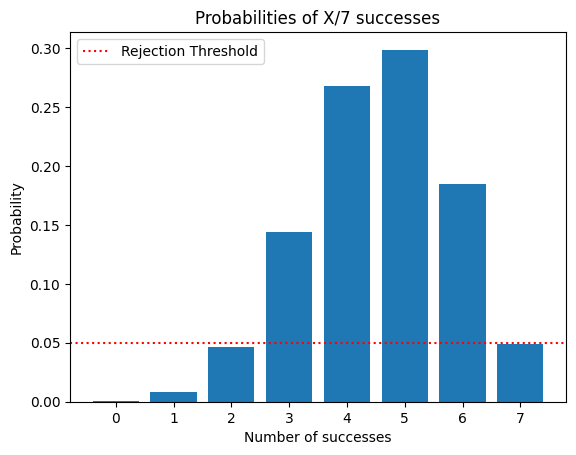

In [92]:
'''Plot Distribution'''
import matplotlib.pyplot as plt

successes = [0,1,2,3,4,5,6,7]
probabilities = [Binomial(7,k,0.65) for k in successes]

plt.bar(successes, probabilities)
plt.axhline(y=0.05, color='r', linestyle=':', label='Rejection Threshold')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Probabilities of X/7 successes')
plt.legend()
plt.show()

***

## QUESTION 3

**[15 marks]**

Answer:

As we sample from a large population N (the entire batch of microchips) we can expect the central limit theorem to come into play.
This implies that our sample mean will be a distance away from the true population mean by a multiple of the Standard error.
The margin of error is that distance.

MOE = z * SE

The standard error is

SE = squareroot(sigma_x / sqrt(n))

As this is a collection of yes/no we can use the Bernoulli distribution giving us a variance of P(1-P), leading to a new SE of

SE = squareroot( P(1-P) / n )

here we can use sample size as n to approximate standard error, as well as assume a required confidence interval of 95%. 2 sigma is 95.14% making 95% ~ 1.9 sigma

From the question we know the accounts department would like the margin of error to be lower than 2.5%, or a fraction of 0.025. And the suspected probability for chips with faults is 0.5

MOE = z * squareroot( P(1-P) / n )

We can arrange this for n to find the sample size needed to "know the probability that any given CPU is faulty to better than 2.5%"

n = (z^2 * P(1-P)) / MOE^2


In [93]:
n = ((1.9**2) * 0.5 *(1-0.5)) / 0.025**2
print(f"{n:.0f}") #Zero dcecimals as we can only check whole numbers of microchips

1444


using the previously stated parameters we can substitute in the equation to

n = ((1.9^2) * 0.5 *(1-0.5)) / 0.025^2 = 1444

So in our report to the accounts department, we would suggest that they need to inspect 1444 microchips.


(brute force check of number below)

The number of units needed to be inspected: 1444


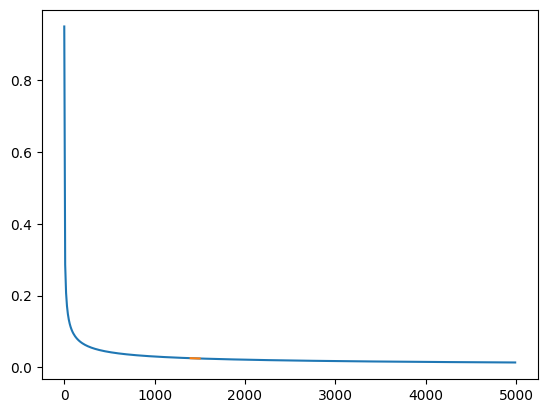

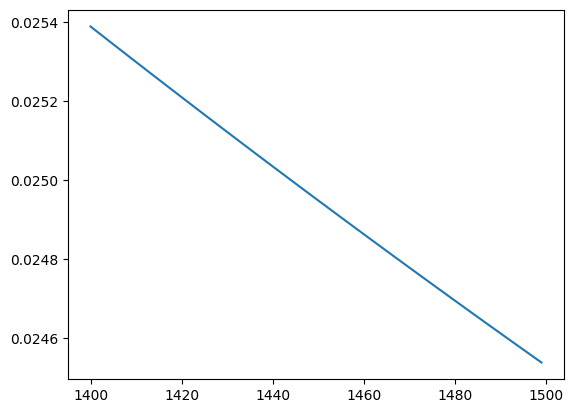

In [94]:
def moe(n, z, P):
  return z * math.sqrt(P*(1-P)/n)

numbers = range(1,5000,10)
allMoes = []

tightNumbers = range(1400,1500,1)
tightMoes = []

for n in numbers:
  allMoes.append(moe(n,1.9,0.5))
for n in tightNumbers:
  tightMoes.append(moe(n,1.9,0.5))

allMoes = np.array(allMoes)
tightMoes = np.array(tightMoes)


plt.plot(numbers,allMoes)
plt.plot(tightNumbers,tightMoes)
plt.figure()
plt.plot(tightNumbers,tightMoes)


# answerIndex = np.where(tightMoes == 0.025) #too exact
closest_index = np.argmin(np.abs(tightMoes - 0.025)) #ChatGPT special
print("The number of units needed to be inspected:",tightNumbers[closest_index])



***

## QUESTION 4

**[25 marks]**

Answer:

We will examine the situation with the lens of Bayes' theorem, the equation for which is stated as:

P(A|B) = P(B|A) * P(A) / P(B)

To be able to use this, we will have to identify each term in the question:
The Posterior is the term that we have been asked to calculate, P(A|B), that is the probability of the police officer being a Democrat given that they oppose the law change.

The "Likelihood" term P(B|A), is the probability that someone opposes the law change given that they are a Democrat.

The prior P(A) is the probability of being a Democrat.

And finally, the most complicated term, the marginal probability P(B) is the probability of being Opposed to the law in total

((P(Democrat) * P(Democrat being opposed to law)) +
(P(Republican) * P(Republican  being opposed to law)) +
(P(Independent) * P(Independent being opposed to law))

Having identified all these elements we can plug them into the equation

In [95]:
'''  P(A|B) = P(B|A) * P(A) / P(B)

P(A|B) = Deomcrat given opposed
P(B|A) = opposed given Demo = (0.2)
P(A) = Demo = (0.4)
P(B) = Opposed = ((demo * demo opp) + (repub * repOpp) + (indi * indi Opp)) = ((0.4*0.2)+(0.36*0.65)+(0.24*0.9))
'''

PAB = 0.2 * 0.4 / ((0.4*0.2)+(0.36*0.65)+(0.24*0.9))

print(f"The probability of the police officer being a Democrat voter is {PAB:.3f}")

The probability of the police officer being a Democrat voter is 0.151


According to this analysis the probability of the police officer being a Democrat voter is ~15%

***

## QUESTION 5

**[30 marks]**

Answer:

With such an open ended challenge I will start with a few simple analysis techniques and plots to guide my exploration of the data.

First finding means and standard deviations and then plotting the 2 sets against each other



Mean 100m: 12.600
Mean 1500m: 259.000
Std Dev 100m : 1.625
Std Dev 1500m : 20.224


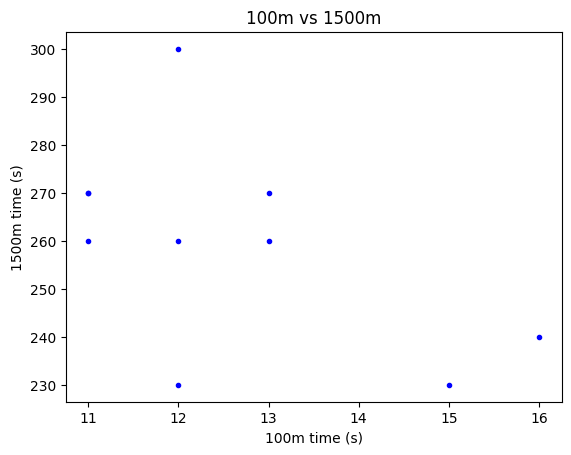

<Figure size 640x480 with 0 Axes>

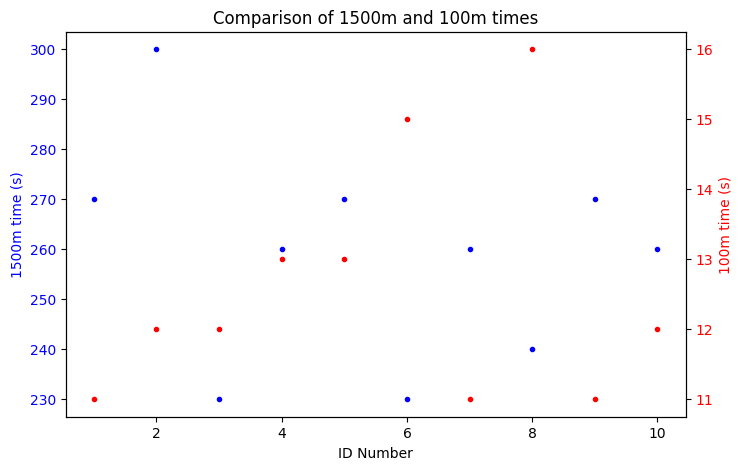

In [96]:
import numpy as np


m100 = np.array([11,12,12,13,13,15,11,16,11,12])
m1500 = np.array([270,300,230,260,270,230,260,240,270,260])
IdNumber = range(1,11,1)


'''Quick help functions'''
#MEAN
def myMean(data):
  return sum(data)/len(data)

mean100 = myMean(m100)
mean1500 = myMean(m1500)

print(f"Mean 100m: {mean100:.3f}")
print(f"Mean 1500m: {mean1500:.3f}")

#STD DEV
def myStdDev(data):
  for i in range(len(data)):
    meanData = myMean(data)
    squaredDifferences = []
    for x in data:
      squaredDifferences.append((x - meanData) ** 2)
    variance = sum(squaredDifferences) / len(data)
    stdDev = math.sqrt(variance)
    return stdDev

print(f"Std Dev 100m : {myStdDev(m100):.3f}")
print(f"Std Dev 1500m : {myStdDev(m1500):.3f}")


'''Plots for visual inspection'''

plt.plot(m100,m1500,"b.")
plt.title("100m vs 1500m")
plt.xlabel("100m time (s)")
plt.ylabel("1500m time (s)")
plt.show()
plt.figure()

# # Create the figure and primary y-axis
# fig, ax1 = plt.subplots(figsize=(8, 5))

# # Plot m1500 on the primary y-axis (left side)
# ax1.plot(IdNumber, m1500, 'b.', label='1500m')
# ax1.set_xlabel('ID Number')
# ax1.set_ylabel('1500m time (s)', color='b')
# ax1.tick_params(axis='y', labelcolor='b')

# # Create a secondary y-axis (right side) that shares the same x-axis
# ax2 = ax1.twinx()
# ax2.plot(IdNumber, m100, 'r.', label='100m')
# ax2.set_ylabel('100m time (s)', color='r')
# ax2.tick_params(axis='y', labelcolor='r')

# # Add a title if desired
# plt.title('Comparison of 1500m and 100m times')

# # Show the plot
# plt.show()


Visually there appears to be a negative correlation between the 100m times and the 1500m times. To test this idea I will use a Pearson's r method to investigate the correlation between the 2 sets. I chose Pearson's over Spearman's as there looks to be a lack of monotonicity in our data, which Spearman's requires.


In [97]:
def pearsonR(X, Y):

    meanX = myMean(X)
    meanY = myMean(Y)

    # Calculate the covariance
    numerator = 0
    for i in range(len(X)):
        numerator += (X[i] - meanX) * (Y[i] - meanY)

    # Calculate the product of Squared things
    sumSqrdX = 0
    for i in range(len(X)):
        sumSqrdX += (X[i] - meanX) ** 2

    sumSqrdY = 0
    for i in range(len(Y)):
        sumSqrdY += (Y[i] - meanY) ** 2

    denominator = (sumSqrdX * sumSqrdY) ** 0.5

    # Calculate Pearson correlation coefficient
    if denominator == 0:
        return 0  # Avoid division by zero
    else:
        r = numerator / denominator
        return r

print(f"Our Pearsons R score for the data set is {pearsonR(m100,m1500):.3f}")

Our Pearsons R score for the data set is -0.530


Comparing to the tables of probabilities given in the class notes
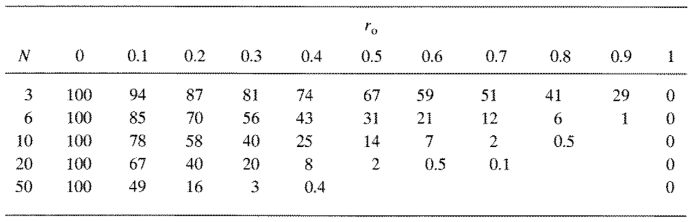

we can see that the probability of these results happening by chance are 14%

This is not a significant finding, the normal threshold is to have a P<5% but given the limited sample size I would include this in my report to the coach/team management